# Cálculo del valor de decisón óptimo para el caso de una regla de decisión MAP de una observación discreta

## Consigna:

Adjunte una Jupyter Notebook en donde:
1. Quede expresado el desarrollo matemático que permite obtener el valor del nivel de decisión para el caso del ejemplo planteado en la clase, pero esta vez para una regla de decisión MAP con valores de intensidad de $\lambda_0=1$ y $\lambda_1=3$ y con probabilidades de hipótesis $P_H(0)=0.7$ y $P_H(1)=0.3$.
2. Genere una simulación Monte Carlo del problema para obtener la probabilidad de error cuando se utiliza el nivel de decisión obtenido en el punto anterior.
3. Cambie el nivel de decisión por el valor obtenido para el caso ML (modifique solo ese valor) y compare el resultado con el valor de probabilidad de error obtenido en el punto anterior. Saque conclusiones de la observación.

*Ayuda*: El siguiente código genera hipótesis binarias con distintas probabilidades:

z = np.random.uniform(size=nb_samples) $\\$ ref = 0.7 $\\$ hypothesis = [1 if z[i]>=ref else 0 for i in range(len(z))]

(Para una mayor comprensión de este código, analícelo con histogramas antes de utilizarlo) 

## Desarrollo:

### 1. Quede expresado el desarrollo matemático que permite obtener el valor del nivel de decisión para el caso del ejemplo planteado en la clase, pero esta vez para una regla de decisión MAP con valores de intensidad de $\lambda_0=1$ y $\lambda_1=3$ y con probabilidades de hipótesis $P_H(0)=0.7$ y $P_H(1)=0.3$

Distribución de probabilidades del canal (vistas en ejemplo anterior):

$H = 0,\hspace{0.3cm} Y \sim P_{Y|H}(y|0) = \frac{\lambda^{y}_{0}e^{-\lambda_{0}}}{y!} = \frac{1^{y}e^{-1}}{y!} (siendo \hspace{0.2cm} \lambda_0 = 1) $

$H = 1,\hspace{0.3cm} Y \sim P_{Y|H}(y|1) = \frac{\lambda^{y}_{0}e^{-\lambda_{1}}}{y!} = \frac{3^{y}e^{-3}}{y!} (siendo \hspace{0.2cm} \lambda_1 = 3) $

Sabiendo que la regla de decisión MAP se calcula de la forma:

$ P_H(1) \cdot P_{Y|H}(y|1) \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} P_H(0) \cdot P_{Y|H}(y|0) = 0.3 \cdot \frac{3^{y}e^{-3}}{y!} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0.7 \cdot \frac{1^{y}e^{-1}}{y!} = 0.3 \cdot 3^{y}e^{-3} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0.7 \cdot 1^{y}e^{-1} = \\ = \ln{(0.3 \cdot 3^{y}e^{-3})} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \ln{(0.7 \cdot 1^{y}e^{-1})} = \ln{(0.3)} + \ln{(3^y)} + \ln{(e^{-3})} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \ln{(0.7)} + \ln{(1^y)} + \ln{(e^{-1})} = \\ = \ln{(0.3)} + y \cdot \ln{(3)} + (-3) \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \ln{(0.7)} + y \cdot \ln{(1)} + (-1) = \ln{(0.3)} + y \cdot \ln{(3)} -3 \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \ln{(0.7)} + (-1) = \\ = y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \frac{ \ln{(0.7)} -1 - \ln{(0.3)} + 3 }{\ln{(3)}} = y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 2.5917 \quad$ (terminado con calculadora)

### 2. Genere una simulación Monte Carlo del problema para obtener la probabilidad de error cuando se utiliza el nivel de decisión obtenido en el punto anterior

*Ayuda*: El siguiente código genera hipótesis binarias con distintas probabilidades:

z = np.random.uniform(size=nb_samples) $\\$ ref = 0.7 $\\$ hypothesis = [1 if z[i]>=ref else 0 for i in range(len(z))]

(Para una mayor comprensión de este código, analícelo con histogramas antes de utilizarlo) 

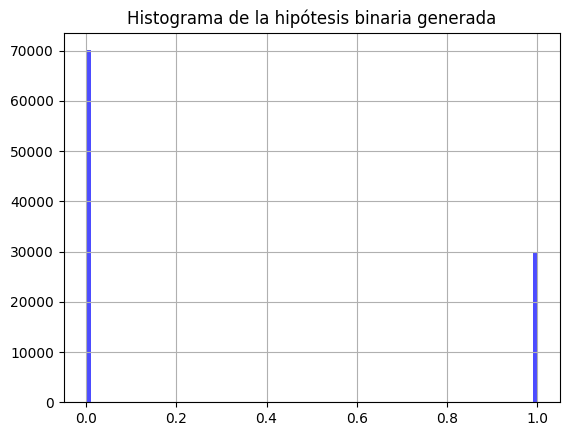

Probabilidad de error:  0.18106


In [4]:
import numpy as np
import matplotlib.pyplot as plt

nb_samples = 100000
z = np.random.uniform(size = nb_samples)
ref = 0.7
hipotesis = [1 if z[i]>=ref else 0 for i in range(len(z))]
    
plt.title("Histograma de la hipótesis binaria generada")
plt.hist(hipotesis, bins=100, color='b', alpha=0.7)
plt.grid()
plt.show()

lambda0 = 1
lambda1 = 3
salida = [np.random.poisson(lambda0) if hipotesis[i]==0 else np.random.poisson(lambda1) for i in range(nb_samples)]

threshold = 2.5971   # Calculado en el ejercicio anterior

hipotesis_decodificada = [1 if salida[i]>= threshold else 0 for i in range(nb_samples)]

pe = sum(1 for i in range(nb_samples) if hipotesis[i] != hipotesis_decodificada[i]) / nb_samples

print("Probabilidad de error: ", pe)

### 3. Cambie el nivel de decisión por el valor obtenido para el caso ML (modifique solo ese valor) y compare el resultado con el valor de probabilidad de error obtenido en el punto anterior. Saque conclusiones de la observación

El valor calculado para el caso ML es $y \geq 1.82$

In [6]:
nb_samples = 100000
z = np.random.uniform(size = nb_samples)
ref = 0.7
hipotesis = [1 if z[i]>=ref else 0 for i in range(len(z))]

lambda0 = 1
lambda1 = 3
salida = [np.random.poisson(lambda0) if hipotesis[i]==0 else np.random.poisson(lambda1) for i in range(nb_samples)]

threshold = 1.82   # Valor para el caso ML

hipotesis_decodificada = [1 if salida[i]>= threshold else 0 for i in range(nb_samples)]

pe = sum(1 for i in range(nb_samples) if hipotesis[i] != hipotesis_decodificada[i]) / nb_samples

print("Probabilidad de error: ", pe)

Probabilidad de error:  0.24577


**Conclusión**: Teniendo en cuenta ambos valores de decisión, las probabilidades de error fueron 0.181 (para la regla de decisión MAP) y 0.2457 (para la regla de decisión ML). Podemos decir que, claramente, la probabilidad de error en el caso ML es mucho mayor. Esto se debe a que la regla de decisión ML no considera la probabilidad de la fuente, por eso es solo recomendada en los casos en que la probabilidad de la fuente es equiprobable, en caso contrario, siempre que se sepa la probabilidad de la fuente se recomienda usar la regla de decisión MAP para asegurar la menor probabilidad de error.